In [1]:
pip install pandas

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

In [5]:
pip install opencv-python

In [6]:
pip install moviepy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [9]:
df=pd.read_csv("audio_text.csv")

In [10]:
df

,File Name,Audio Features,Dialogue_ID,Utterance_ID,Speaker,Emotion,Sentiment,Season,Episode,StartTime,EndTime,Processed_Utterance,Duration,Processed_Utterance_Str
0,dia0_utt0.mp4,"[-297.01422119140625, 153.53903198242188, -49....",0,0,Chandler,neutral,neutral,8,21,"00:16:16,059","00:16:21,731","['also', 'point', 'person', 'transition', 'sys...",5.672,also point person transition system
1,dia0_utt1.mp4,"[-305.7720031738281, 137.69033813476562, -23.7...",0,1,The Interviewer,neutral,neutral,8,21,"00:16:21,940","00:16:23,442","['hand', 'full']",1.502,hand full
2,dia0_utt10.mp4,"[-296.2013854980469, 170.54347229003906, -59.9...",0,10,Chandler,fear,negative,8,21,"00:17:02,856","00:17:04,858",['beg'],2.002,beg
3,dia0_utt11.mp4,"[-296.4863586425781, 136.7867431640625, -41.92...",0,11,The Interviewer,neutral,neutral,8,21,"00:17:05,025","00:17:13,324","['right', 'definite', 'answer', 'monday', 'thi...",8.299,right definite answer monday think say confide...
4,dia0_utt12.mp4,"[-317.79937744140625, 113.78086853027344, -45....",0,12,Chandler,surprise,positive,8,21,"00:17:13,491","00:17:16,536",['really'],3.045,really
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,dia9_utt5.mp4,"[-312.27630615234375, 192.239990234375, -57.04...",9,5,Chandler,neutral,neutral,2,5,"0:02:16,261","0:02:16,903",['back'],0.642,back
9984,dia9_utt6.mp4,"[-396.946533203125, 192.0432586669922, -47.444...",9,6,Jade,neutral,neutral,2,5,"0:02:16,903","0:02:19,185","['gon', 'na', 'get', 'together']",2.282,gon na get together
9985,dia9_utt7.mp4,"[-357.1268005371094, 165.3511199951172, -44.15...",9,7,Chandler,neutral,neutral,2,5,"00:02:19,347","00:02:25,561","['um', 'absolutely', 'uh', 'tomorrow', 'aftern...",6.214,um absolutely uh tomorrow afternoon know uh ce...
9986,dia9_utt8.mp4,"[-407.03076171875, 154.23944091796875, -39.508...",9,8,Jade,neutral,neutral,2,5,"00:02:25,770","00:02:28,647","['great', 'see']",2.877,great see


In [11]:
import ast

# Convert the 'Audio Features' column to a list of lists
df['Audio Features'] = df['Audio Features'].apply(ast.literal_eval)

# Calculate the length of each list in the 'Audio Features' column
df['Features Length'] = df['Audio Features'].apply(len)


In [12]:
data=df

In [13]:
df=df.drop(["Sentiment","StartTime","EndTime"], axis=1)

In [14]:
df

,File Name,Audio Features,Dialogue_ID,Utterance_ID,Speaker,Emotion,Season,Episode,Processed_Utterance,Duration,Processed_Utterance_Str,Features Length
0,dia0_utt0.mp4,"[-297.01422119140625, 153.53903198242188, -49....",0,0,Chandler,neutral,8,21,"['also', 'point', 'person', 'transition', 'sys...",5.672,also point person transition system,13
1,dia0_utt1.mp4,"[-305.7720031738281, 137.69033813476562, -23.7...",0,1,The Interviewer,neutral,8,21,"['hand', 'full']",1.502,hand full,13
2,dia0_utt10.mp4,"[-296.2013854980469, 170.54347229003906, -59.9...",0,10,Chandler,fear,8,21,['beg'],2.002,beg,13
3,dia0_utt11.mp4,"[-296.4863586425781, 136.7867431640625, -41.92...",0,11,The Interviewer,neutral,8,21,"['right', 'definite', 'answer', 'monday', 'thi...",8.299,right definite answer monday think say confide...,13
4,dia0_utt12.mp4,"[-317.79937744140625, 113.78086853027344, -45....",0,12,Chandler,surprise,8,21,['really'],3.045,really,13
...,...,...,...,...,...,...,...,...,...,...,...,...
9983,dia9_utt5.mp4,"[-312.27630615234375, 192.239990234375, -57.04...",9,5,Chandler,neutral,2,5,['back'],0.642,back,13
9984,dia9_utt6.mp4,"[-396.946533203125, 192.0432586669922, -47.444...",9,6,Jade,neutral,2,5,"['gon', 'na', 'get', 'together']",2.282,gon na get together,13
9985,dia9_utt7.mp4,"[-357.1268005371094, 165.3511199951172, -44.15...",9,7,Chandler,neutral,2,5,"['um', 'absolutely', 'uh', 'tomorrow', 'aftern...",6.214,um absolutely uh tomorrow afternoon know uh ce...,13
9986,dia9_utt8.mp4,"[-407.03076171875, 154.23944091796875, -39.508...",9,8,Jade,neutral,2,5,"['great', 'see']",2.877,great see,13


In [15]:
# Convert 'Audio Features' and 'Emotion' columns to NumPy arrays
audio_features = df['Audio Features'].apply(lambda x: np.array(x, dtype=float)).to_numpy()
emotions = df['Emotion'].to_numpy()
file_paths = df['File Name'].to_numpy()


In [16]:
audio_features

array([array([-2.97014221e+02,  1.53539032e+02, -4.90380211e+01,  5.46977043e+01,
              -5.27428484e+00,  6.43434191e+00, -3.85622478e+00, -1.16022074e+00,
               1.19830534e-01, -8.91124153e+00,  1.22017086e+00,  3.14986753e+00,
              -3.25099730e+00])                                                  ,
       array([-305.77200317,  137.69033813,  -23.75961876,   50.2026825 ,
                -2.27249265,    5.5844698 ,   -0.9529689 ,   -1.49110889,
               -14.78405285,   -3.26989985,    0.4343493 ,   -5.73031712,
                 0.49802315])                                            ,
       array([-296.2013855 ,  170.54347229,  -59.91713715,   15.52770996,
               -11.92023182,   -0.72530061,   -5.87638903,  -11.01383018,
                -5.43226624,  -11.78423595,   -7.7017417 ,    3.51267433,
                -3.61513329])                                            ,
       ...,
       array([-357.12680054,  165.35112   ,  -44.15581894,   11.4

In [17]:
# Convert emotion labels to numerical values
emotion_to_num = {label: idx for idx, label in enumerate(set(emotions))}
numeric_emotions = np.array([emotion_to_num[emotion] for emotion in emotions])


In [18]:
emotion_to_num

{'neutral': 0,
 'joy': 1,
 'anger': 2,
 'surprise': 3,
 'disgust': 4,
 'sadness': 5,
 'fear': 6}

In [19]:
# Determine the maximum length of feature arrays
max_length = max(len(features) for features in audio_features)

# Pad all feature arrays to the maximum length
padded_features = np.array([
    np.pad(features, (0, max_length - len(features)), 'constant') for features in audio_features
])


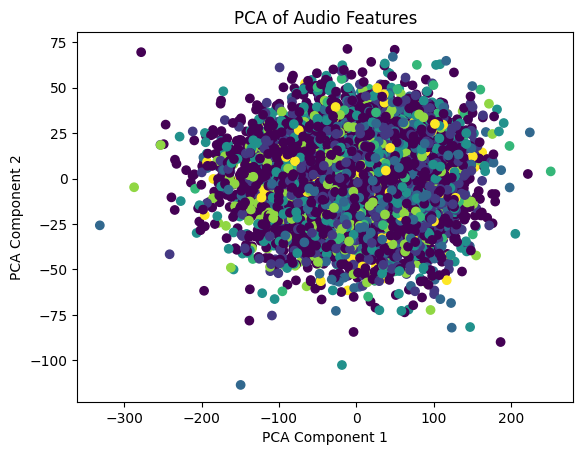

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(padded_features)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=numeric_emotions)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Audio Features')
plt.show()


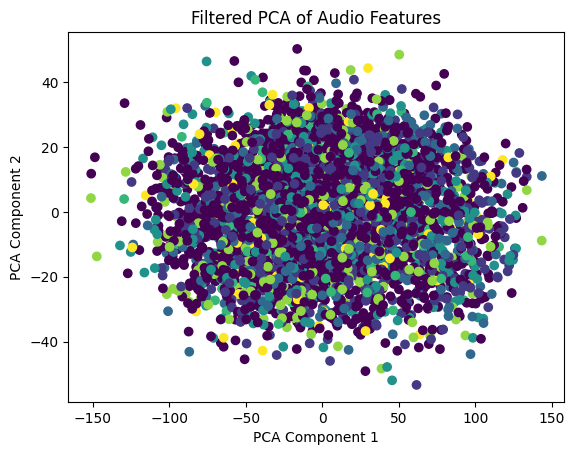

Type of audio_features: <class 'numpy.ndarray'>
Shape of audio_features: (4994, 13)
Shape after stacking: (4994, 13)
Cleaned audio features shape: (2680, 13)
Cleaned emotions shape: (2680,)
Cleaned file paths length: 2680


In [21]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import stats

# Assuming filtered_features, filtered_labels, and file_paths are defined
clf = IsolationForest(contamination=0.5)
outliers = clf.fit_predict(padded_features)

# Filter out the outliers
inliers_mask = outliers != -1
filtered_features = padded_features[inliers_mask]
filtered_labels = numeric_emotions[inliers_mask]
filtered_file_paths = file_paths[inliers_mask]

# Visualize filtered data
pca = PCA(n_components=2)
filtered_reduced_features = pca.fit_transform(filtered_features)
plt.scatter(filtered_reduced_features[:, 0], filtered_reduced_features[:, 1], c=filtered_labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Filtered PCA of Audio Features')
plt.show()

# Check the type and shape of the audio_features
print(f"Type of audio_features: {type(filtered_features)}")
print(f"Shape of audio_features: {filtered_features.shape}")

# Ensure all elements in audio_features are numerical arrays
if filtered_features.ndim == 1:
    # If audio_features is 1D, convert to 2D by stacking
    filtered_features = np.vstack(filtered_features)

print(f"Shape after stacking: {filtered_features.shape}")

# Check for and handle any irregular shapes
try:
    # Calculate z-scores
    z_scores = np.abs(stats.zscore(filtered_features, axis=0))
except Exception as e:
    print(f"Error calculating z-scores: {e}")

# Define a threshold (e.g., 3 standard deviations)
threshold = 2

# Find indices where z-score is greater than threshold
outliers = (z_scores > threshold).any(axis=1)

# Filter out outliers
cleaned_audio_features = filtered_features[~outliers]
cleaned_emotions = filtered_labels[~outliers]
cleaned_file_paths = filtered_file_paths[~outliers]

print(f"Cleaned audio features shape: {cleaned_audio_features.shape}")
print(f"Cleaned emotions shape: {cleaned_emotions.shape}")
print(f"Cleaned file paths length: {len(cleaned_file_paths)}")

# Proceed with further processing and model training


In [22]:
cleaned_file_paths

array(['dia0_utt11.mp4', 'dia0_utt5.mp4', 'dia0_utt6.mp4', ...,
       'dia9_utt12.mp4', 'dia9_utt13.mp4', 'dia9_utt4.mp4'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder

# Assuming cleaned_emotions contains the list of emotion labels
label_encoder = LabelEncoder()
encoded_emotions = label_encoder.fit_transform(cleaned_emotions)


In [24]:
encoded_emotions

array([0, 0, 0, ..., 4, 2, 0])

In [25]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to your cleaned data
X_resampled, y_resampled = smote.fit_resample(cleaned_audio_features, encoded_emotions)

print(f"Resampled audio features shape: {X_resampled.shape}")
print(f"Resampled emotions shape: {y_resampled.shape}")


Resampled audio features shape: (9016, 13)
Resampled emotions shape: (9016,)


In [27]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape data if necessary (e.g., for Conv1D)
X_resampled = np.expand_dims(X_resampled, axis=-1)  # Add channel dimension if needed

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_resampled.shape[1], X_resampled.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_resampled, y_resampled, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_resampled, y_resampled)
print(f"Model loss: {loss}")
print(f"Model accuracy: {accuracy}")


C:\Users\ragha\anaconda3\envs\audioproject\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2091 - loss: 2.9362 - val_accuracy: 0.0000e+00 - val_loss: 4.8750
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2516 - loss: 1.8357 - val_accuracy: 0.0033 - val_loss: 3.7172
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2804 - loss: 1.7516 - val_accuracy: 5.5432e-04 - val_loss: 3.7557
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2825 - loss: 1.7413 - val_accuracy: 0.0000e+00 - val_loss: 3.5777
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2882 - loss: 1.7250 - val_accuracy: 0.0028 - val_loss: 3.6308
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3112 - loss: 1.6868 - val_accuracy: 0.0000e+00 - val_loss: 3.7128
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3185 - loss: 1.6648 - val_accuracy: 0.0000e+00 - val_loss: 3.6863
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3486 - los

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


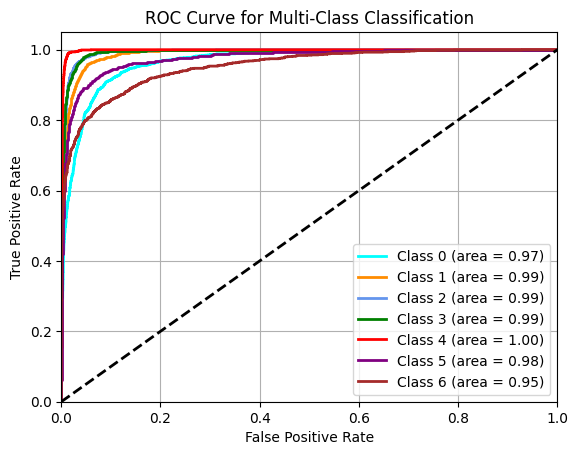

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the labels for ROC curve (one-hot encoding)
y_binarized = label_binarize(y_resampled, classes=range(len(label_encoder.classes_)))

# Predict the probabilities
y_score = model.predict(X_resampled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])
plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for the test set
y_pred_probs = model.predict(X_resampled)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Convert one-hot encoded y_test back to class labels
y_test_labels = y_resampled


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [31]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test_labels and y_pred are your actual and predicted labels
cm = confusion_matrix(y_test_labels, y_pred)


# Generate and print classification report
report = classification_report(y_test_labels, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.89      0.75      1288
           1       0.79      0.94      0.86      1288
           2       0.87      0.94      0.90      1288
           3       0.90      0.90      0.90      1288
           4       0.89      0.99      0.94      1288
           5       0.89      0.77      0.83      1288
           6       0.99      0.36      0.53      1288

    accuracy                           0.83      9016
   macro avg       0.85      0.83      0.81      9016
weighted avg       0.85      0.83      0.81      9016



In [32]:
emotion_to_num.keys()

dict_keys(['neutral', 'joy', 'anger', 'surprise', 'disgust', 'sadness', 'fear'])

In [33]:
cm

array([[1147,   64,   15,   24,   27,   11,    0],
       [  47, 1206,    9,   11,    6,    8,    1],
       [  36,   18, 1212,    4,   11,    7,    0],
       [  70,   35,   12, 1160,    7,    3,    1],
       [   1,    1,    6,    1, 1279,    0,    0],
       [ 134,   62,   36,   24,   33,  997,    2],
       [ 332,  146,  107,   70,   74,   97,  462]])

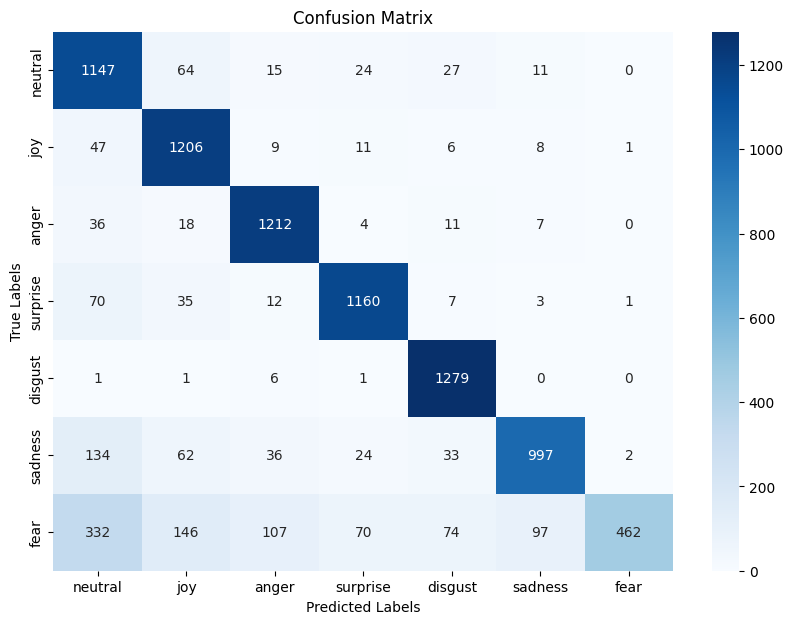

In [34]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_to_num.keys(),
            yticklabels=emotion_to_num.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()